<a href="https://colab.research.google.com/github/NKASG/Traffic_police_gesture/blob/main/Gesture_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import models, layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Data Preprocessing**

In [ ]:
# Define the ImageDataGenerator with preprocessing options
datagen = ImageDataGenerator(
    rescale=1./255,          # Rescale pixel values to [0, 1]
    rotation_range=20,       # Random rotation up to 20 degrees
    width_shift_range=0.1,   # Random horizontal shift
    height_shift_range=0.1,  # Random vertical shift
    shear_range=0.1,         # Shear transformation
    zoom_range=0.1,          # Random zoom
    horizontal_flip=True,   # Random horizontal flip
    fill_mode='nearest' ,    # Fill mode for points outside the input boundaries
    validation_split=0.1
)


In [ ]:
train_generator = datagen.flow_from_directory(
    directory='/content/drive/MyDrive/Gesture/augmented_data',
    target_size=(256, 256),  # Resize images to a fixed size
    batch_size=32,
    class_mode='categorical', # If you have multiple classes
    subset= 'training'
)

valid_generator = datagen.flow_from_directory(
    directory='/content/drive/MyDrive/Gesture/augmented_data',
    target_size=(256, 256),  # Resize images to a fixed size
    batch_size=32,
    class_mode='categorical', # If you have multiple classes
    subset= 'validation'
)

test_generator = datagen.flow_from_directory(
    directory='/content/drive/MyDrive/Gesture/test',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)


Found 9264 images belonging to 8 classes.
Found 2311 images belonging to 8 classes.
Found 1763 images belonging to 8 classes.


In [ ]:
# Retrieve class names
class_names = list(train_generator.class_indices.keys())


# Print class names
print("Class names:", class_names)


Class names: ['Change_Lane', 'Get_Off', 'Left_Wait', 'Pass', 'Slow_Down', 'Stop', 'Turn_Left', 'Turn_Right']
comp:, ['Change_Lane', 'Get_Off', 'Left_wait', 'Pass', 'Slow_Down', 'Stop', 'Turn _Left', 'Turn_Right']


**Data Visualization**

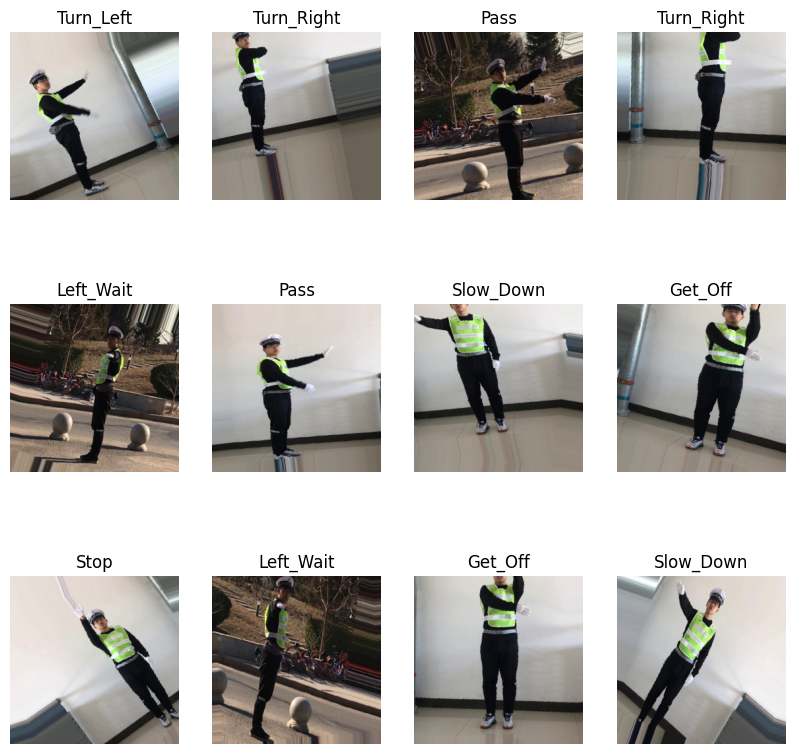

In [ ]:
import matplotlib.pyplot as plt

# Retrieve a batch of images and labels from train_ds
image_batch, labels_batch = next(train_generator)

plt.figure(figsize=(10, 10))
for i in range(min(len(image_batch), 12)):  # Ensure only up to 12 images are plotted
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(image_batch[i])
    plt.title(class_names[tf.argmax(labels_batch[i])])  # Assuming 'class_names' is defined elsewhere
    plt.axis("off")

plt.show()



**MODEL BUILDING**

In [ ]:
# Load pre-trained ResNet50 model (you can choose a different variant if needed)
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the layers of the pre-trained model
for layer in resnet_model.layers:
    layer.trainable = False

# Add a new classifier on top of the ResNet base
num_classes = 8  # Replace with the number of classes in your dataset
model = models.Sequential([
    resnet_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model you can change the epochs 5 was used because of computational ability
history = model.fit(train_generator, batch_size=32, epochs=5, validation_data=valid_generator)


Epoch 1/5
290/290 [==============================] - 4841s 17s/step - loss: 1.9895 - accuracy: 0.2171 - val_loss: 1.9007 - val_accuracy: 0.2315
Epoch 2/5
272/290 [===========================>..] - ETA: 2:35 - loss: 1.8611 - accuracy: 0.2848

In [ ]:
scores = model.evaluate(test_generator)

In [ ]:
history.history.keys()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy', )
plt.xlabel('epoch')
plt.legend(['accuracy','val_acc'], loc= 'upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'], loc= 'upper left')
plt.show()